#General 1-D Burgers Equation Solver
Equation:   $u_{t} + uu_{x}-\frac{0.01}{\pi}u_{xx} = 0$  
(Dirichlet Boundary Conditions)   

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, InputLayer, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_normal

##Input Boundary & Initial Conditions


$x \in [x_1, x_2]$\
$t \in [0, t]$

In [ ]:
x1 = float(input('x1   : '))
x2 = float(input('x2   : '))
t = float(input('t    : '))
x = np.linspace(x1, x2, 256)
t = np.linspace(0, t, 100)
u_x1 = np.array(eval(input('u(x1,t)  : ')), dtype='float64')
u_x2 = np.array(eval(input('u(x2,t)  : ')), dtype='float64')
u_x =  np.array(eval(input('u(x,0)   : ')), dtype='float64')
if u_x1.size==1:
  u_x1 = u_x1*np.ones(100)
if u_x2.size==1:
  u_x2 = u_x2*np.ones(100)
if u_x.size==1:
  u_x = u_x*np.ones(100)

x1   : -1
x2   : 1
t    : 1
u(x1,t)  : 0
u(x2,t)  : 0
u(x,0)   : -np.sin(np.pi*x)


## Generating Training Data

In [ ]:
X, T = np.meshgrid(x,t)
xx1 = np.hstack((X[0:1,:].T, T[0:1,:].T))
xx2 = np.hstack((X[:,0:1], T[:,0:1]))
xx3 = np.hstack((X[:,-1:], T[:,-1:]))
X_train = np.vstack([xx1, xx2, xx3])
u_x = np.reshape(u_x, (256,1))
u_x1 = np.reshape(u_x1, (100,1))
u_x2 = np.reshape(u_x2, (100,1))
u_train = np.vstack([u_x, u_x2, u_x1])
np.random.seed(107)
idx = np.random.choice(X_train.shape[0], 200, replace=False)                  
X_train = X_train[idx, :]
u_train = u_train[idx,:]
lb = np.array([x1,0], dtype='float64')
ub = np.array([x2,max(t)], dtype='float64')

## PINN

In [ ]:
layers = [2, 25, 25, 25, 25, 25, 25, 25, 25, 1]
model = Sequential()
model.add(InputLayer(layers[0],))
model.add(Lambda(lambda X: 2.0*(X - lb)/(ub - lb) - 1.0))
for i in layers[1:-1]:
  model.add(Dense(units=i, activation="tanh", kernel_initializer="glorot_normal"))
model.add(Dense(units=layers[-1], kernel_initializer="glorot_normal"))
model.load_weights('pinn1_weights.h5')
flag = 0
for layer in model.layers:
  if flag==8:
    pass
  else:
    layer.trainable = False
    flag += 1
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
model.fit(X_train, u_train, batch_size=32, epochs=1000, verbose=2)

Epoch 1/1000
7/7 - 0s - loss: 1.5999e-04 - mae: 0.0092
Epoch 2/1000
7/7 - 0s - loss: 1.0082e-04 - mae: 0.0079
Epoch 3/1000
7/7 - 0s - loss: 5.7686e-05 - mae: 0.0064
Epoch 4/1000
7/7 - 0s - loss: 4.5112e-05 - mae: 0.0056
Epoch 5/1000
7/7 - 0s - loss: 3.1110e-05 - mae: 0.0045
Epoch 6/1000
7/7 - 0s - loss: 2.1367e-05 - mae: 0.0033
Epoch 7/1000
7/7 - 0s - loss: 1.3275e-05 - mae: 0.0026
Epoch 8/1000
7/7 - 0s - loss: 1.0098e-05 - mae: 0.0020
Epoch 9/1000
7/7 - 0s - loss: 9.3618e-06 - mae: 0.0018
Epoch 10/1000
7/7 - 0s - loss: 9.5583e-06 - mae: 0.0020
Epoch 11/1000
7/7 - 0s - loss: 8.4576e-06 - mae: 0.0018
Epoch 12/1000
7/7 - 0s - loss: 9.9348e-06 - mae: 0.0021
Epoch 13/1000
7/7 - 0s - loss: 8.9815e-06 - mae: 0.0020
Epoch 14/1000
7/7 - 0s - loss: 8.7996e-06 - mae: 0.0020
Epoch 15/1000
7/7 - 0s - loss: 9.3862e-06 - mae: 0.0022
Epoch 16/1000
7/7 - 0s - loss: 8.8066e-06 - mae: 0.0021
Epoch 17/1000
7/7 - 0s - loss: 7.9006e-06 - mae: 0.0016
Epoch 18/1000
7/7 - 0s - loss: 7.8794e-06 - mae: 0.0017
E

#Model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 2)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_28 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_29 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_30 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_31 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_32 (Dense)             (None, 25)               

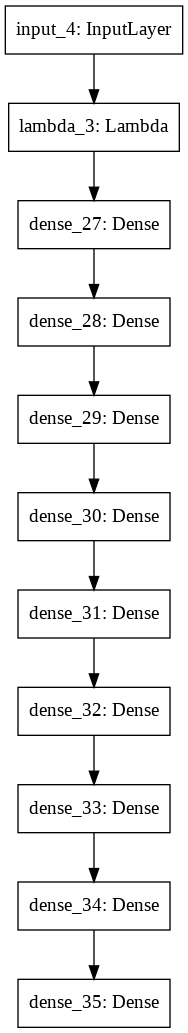

In [ ]:
model.summary()
keras.utils.plot_model(model)

## Solver

In [ ]:
X = np.hstack([np.linspace(-1,1,10).reshape(10,1), np.linspace(0,1,10).reshape(10,1)])
model.predict(X)

array([[ 1.9189087e-03],
       [ 5.0122064e-01],
       [ 7.5975657e-01],
       [ 8.9923644e-01],
       [ 9.5901644e-01],
       [-9.3421382e-01],
       [-6.6322285e-01],
       [-4.0596026e-01],
       [-1.8748012e-01],
       [-7.6542003e-04]], dtype=float32)